## CSIS 3290 – 001 – Term Project
### Name- Arpit Mohanani
### Student ID- 300337709

### Brief Description

In this project we will be focusing on predicting whether an individual's income is more than $50k per year or not using various features like age , education qualifications, marital status, occupation and more.
Using all these features we will predict the category to which the individual belongs i.e either more than 50k per year or less than 50k per year. We will use various regression models in this project to achieve our goal.

### Library import and data loading

In [61]:
import numpy as np
import pandas as pd
import seaborn as seab
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [62]:
df = pd.read_csv('Dataset/adult.csv') # Reads the csv file

In [63]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Cleaning Data

In [64]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
status               0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [65]:
df.dropna(axis=0,how='any',inplace=True) # Drops all rows having any null value

In [66]:
df.drop(['race'],axis="columns",inplace=True)
df.drop(['relationship'],axis="columns",inplace=True)

In [67]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
status            0
occupation        0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [68]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
status            object
occupation        object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### Renaming columns

In [69]:
df.rename(columns={'education-num': 'education_num'}, inplace=True)
df.rename(columns={'capital-gain': 'capital_gain'}, inplace=True)
df.rename(columns={'capital-loss': 'capital_loss'}, inplace=True)
df.rename(columns={'hours-per-week': 'hours_per_week'}, inplace=True)
df.rename(columns={'native-country': 'native_country'}, inplace=True)

In [70]:
#Few minro corrections in data
df = df.replace(' ','', regex=True)
df = df.replace('-','_', regex=True)

In [71]:
df.head()

,age,workclass,fnlwgt,education,education_num,status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State_gov,77516,Bachelors,13,Never_married,Adm_clerical,Male,2174,0,40,United_States,<=50K
1,50,Self_emp_not_inc,83311,Bachelors,13,Married_civ_spouse,Exec_managerial,Male,0,0,13,United_States,<=50K
2,38,Private,215646,HS_grad,9,Divorced,Handlers_cleaners,Male,0,0,40,United_States,<=50K
3,53,Private,234721,11th,7,Married_civ_spouse,Handlers_cleaners,Male,0,0,40,United_States,<=50K
4,28,Private,338409,Bachelors,13,Married_civ_spouse,Prof_specialty,Female,0,0,40,Cuba,<=50K


#### Reducing number of unique values in various columns

In [72]:
df['workclass'].unique()

array(['State_gov', 'Self_emp_not_inc', 'Private', 'Federal_gov',
       'Local_gov', 'Self_emp_inc', 'Without_pay'], dtype=object)

In [73]:
df.loc[df['workclass'].str.contains('(?i)gov'),'workclass'] = 'government'
df.loc[df['workclass'].str.contains('(?i)Self_emp'),'workclass'] = 'Self_emp'

In [74]:
df['workclass'].unique()

array(['government', 'Self_emp', 'Private', 'Without_pay'], dtype=object)

In [75]:
df['status'].unique()

array(['Never_married', 'Married_civ_spouse', 'Divorced',
       'Married_spouse_absent', 'Separated', 'Married_AF_spouse',
       'Widowed'], dtype=object)

In [76]:
df.loc[df['status'].str.contains('(?i)Never_married|Divorced|Separated|Widowed'),'status'] = 'not_married'
df.loc[df['status'].str.contains('(?i)Married_civ_spouse|Married_spouse_absent|Married_AF_spouse'),'status'] = 'married'

In [77]:
df['status'].unique()

array(['not_married', 'married'], dtype=object)

In [78]:
df['education'].unique()

array(['Bachelors', 'HS_grad', '11th', 'Masters', '9th', 'Some_college',
       'Assoc_acdm', '7th_8th', 'Doctorate', 'Assoc_voc', 'Prof_school',
       '5th_6th', '10th', 'Preschool', '12th', '1st_4th'], dtype=object)

In [79]:
df.loc[df['education'].str.contains('(?i)11th|10th|12th'),'education'] = 'SS_grad'
df.loc[df['education'].str.contains('(?i)9th|7th_8th'),'education'] = 'ES_grad'
df.loc[df['education'].str.contains('(?i)1st_4th|5th_6th'),'education'] = 'Preschool'
df.loc[df['education'].str.contains('(?i)Some_college|Assoc_acdm|Prof_school|Assoc_voc'),'education'] = 'Bachelors'

In [80]:
df['education'].unique()

array(['Bachelors', 'HS_grad', 'SS_grad', 'Masters', 'ES_grad',
       'Doctorate', 'Preschool'], dtype=object)

In [81]:
df['occupation'].value_counts()

Prof_specialty       4038
Craft_repair         4030
Exec_managerial      3992
Adm_clerical         3721
Sales                3584
Other_service        3212
Machine_op_inspct    1966
Transport_moving     1572
Handlers_cleaners    1350
Farming_fishing       989
Tech_support          912
Protective_serv       644
Priv_house_serv       143
Armed_Forces            9
Name: occupation, dtype: int64

In [82]:
df.drop(df.loc[df.occupation.str.contains('(?i)Armed_Forces')].index, inplace=True)
df.loc[df['occupation'].str.contains('(?i)Priv_house_serv|Protective_serv|Handlers_cleaners'),'occupation'] = 'servant'
df.loc[df['occupation'].str.contains('(?i)Exec_managerial|Adm_clerical|Sales'),'occupation'] = 'corporate_job'
df.loc[df['occupation'].str.contains('(?i)Machine_op_inspct|Tech_support'),'occupation'] = 'it_job'

In [83]:
df['native_country'].value_counts()

United_States                 27495
Mexico                          610
Philippines                     188
Germany                         128
Puerto_Rico                     109
Canada                          107
India                           100
El_Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican_Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [84]:
df.loc[df['native_country'].str.contains('(?i)Holand_Netherlands|Scotland|Honduras|Hungary|Outlying_US|Yugoslavia|Laos|Thailand|Trinadad&Tobago|Cambodia|Hong|Ireland|Ecuador|France|Greece|Peru|Nicaragua|Portugal|Haiti|Iran|Taiwan|Poland|Columbia|Japan|Guatemala|Vietnam|Dominican_Republic|China|Italy|South|Jamaica|England|Cuba'),'native_country'] = 'Other' # Putting countries having less count to Others category

In [85]:
df['income'].value_counts()

<=50K    22646
>50K      7507
Name: income, dtype: int64

In [86]:
df.loc[df['income'].str.contains('(?i)<'),'income'] = 'more_than_50k'
df.loc[df['income'].str.contains('(?i)>'),'income'] = 'less_than_50k'
df.head()

,age,workclass,fnlwgt,education,education_num,status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,government,77516,Bachelors,13,not_married,corporate_job,Male,2174,0,40,United_States,more_than_50k
1,50,Self_emp,83311,Bachelors,13,married,corporate_job,Male,0,0,13,United_States,more_than_50k
2,38,Private,215646,HS_grad,9,not_married,servant,Male,0,0,40,United_States,more_than_50k
3,53,Private,234721,SS_grad,7,married,servant,Male,0,0,40,United_States,more_than_50k
4,28,Private,338409,Bachelors,13,married,Prof_specialty,Female,0,0,40,Other,more_than_50k


In [87]:
df.head()

,age,workclass,fnlwgt,education,education_num,status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,government,77516,Bachelors,13,not_married,corporate_job,Male,2174,0,40,United_States,more_than_50k
1,50,Self_emp,83311,Bachelors,13,married,corporate_job,Male,0,0,13,United_States,more_than_50k
2,38,Private,215646,HS_grad,9,not_married,servant,Male,0,0,40,United_States,more_than_50k
3,53,Private,234721,SS_grad,7,married,servant,Male,0,0,40,United_States,more_than_50k
4,28,Private,338409,Bachelors,13,married,Prof_specialty,Female,0,0,40,Other,more_than_50k


### Saving cleaned dataset

In [88]:
df.to_csv('Dataset/adult_cleaned.csv',index=False) # Saves the cleaned dataset

### EDA

#### Feature Observation


In [89]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076535,0.043492,0.080136,0.060062,0.101563
fnlwgt,-0.076535,1.000000,-0.045124,0.000432,-0.009964,-0.022944
education_num,0.043492,-0.045124,1.000000,0.124427,0.079444,0.152548
capital_gain,0.080136,0.000432,0.124427,1.000000,-0.032227,0.080446
capital_loss,0.060062,-0.009964,0.079444,-0.032227,1.000000,0.052455
hours_per_week,0.101563,-0.022944,0.152548,0.080446,0.052455,1.000000


Using the above features we can predict the income range of the individual :-

- Unmarried individuals might have more time for self development and improve their skills in order to earn more money.

- In most cases education is directly proportional to the earnings. The better the education a person gets the more he/she might earn.

- Age is also a major factor to consider. With age comes experience and more experienced person achieves more in life.

- The more the person works the more he/she earns. So number of hours worked per week is directly proportional to the income of the person and is a strong factor to be considered.

#### Univariate Analysis

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

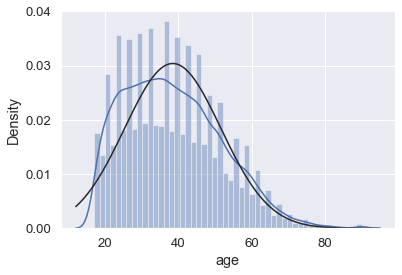

In [90]:
seab.distplot(df.age, fit=norm)

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

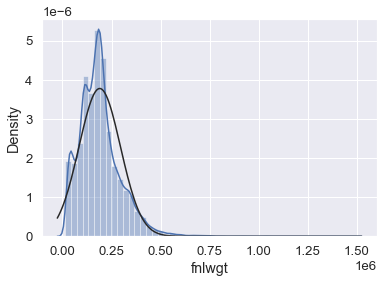

In [91]:
seab.distplot(df.fnlwgt, fit=norm)

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education_num', ylabel='Density'>

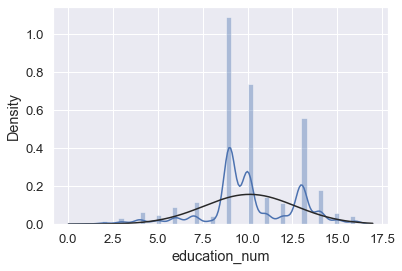

In [92]:
seab.distplot(df.education_num, fit=norm)

#### Multivariate Analysis

Text(0.5, 1.0, 'education_num vs age')

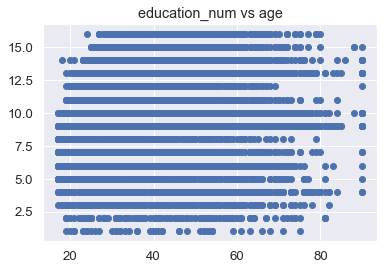

In [93]:
plt.scatter(df.age, df.education_num)
plt.title("education_num vs age")

Text(0.5, 1.0, 'fnlwgt vs age')

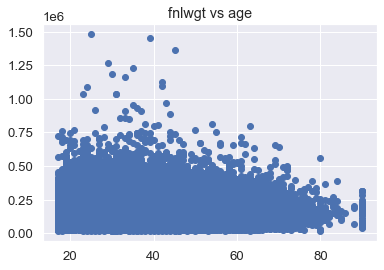

In [94]:
plt.scatter(df.age, df.fnlwgt)
plt.title("fnlwgt vs age")

Text(0.5, 1.0, 'fnlwgt vs education_num')

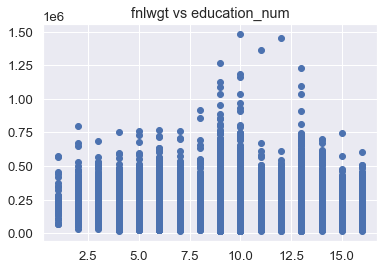

In [95]:
plt.scatter(df.education_num, df.fnlwgt)
plt.title("fnlwgt vs education_num")

#### Count Plots

In [96]:
desc_df = df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.95])
desc_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30153.000000,3.015300e+04,30153.000000,30153.000000,30153.000000,30153.000000
mean,38.440354,1.897862e+05,10.121315,1092.333798,88.336285,40.931317
std,13.135197,1.056591e+05,2.550162,7407.427733,404.223450,11.979579
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
10%,22.000000,6.573900e+04,7.000000,0.000000,0.000000,25.000000
25%,28.000000,1.176180e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784210e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376240e+05,13.000000,0.000000,0.000000,45.000000
95%,62.000000,3.797204e+05,14.000000,5013.000000,0.000000,60.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [97]:
fnlwgt75_index = df.loc[df.fnlwgt > 2.376240e+05].index
fnlwgt_75 = df.loc[fnlwgt75_index]

<AxesSubplot:xlabel='income', ylabel='count'>

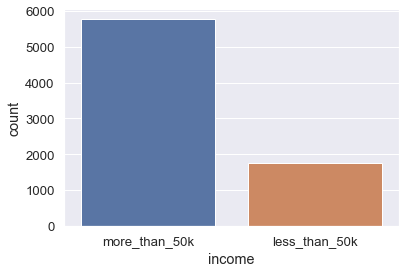

In [98]:
seab.countplot(x=fnlwgt_75.income)

In [99]:
age75_index = df.loc[df.age > 47].index # Getting indexes where age is more than 75 percentile
age_75 = df.loc[age75_index]

<AxesSubplot:xlabel='income', ylabel='count'>

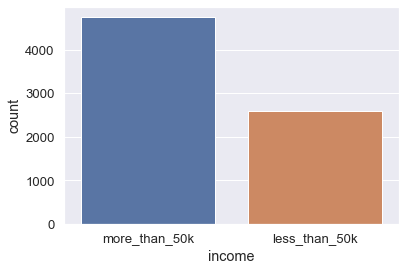

In [100]:
seab.countplot(x=age_75.income)

With age comes experience, so the more the age the more the income

In [101]:
edu75_index = df.loc[df.education_num > 13].index # Getting indexes where education number is more than 75 percentile
edu_75 = df.loc[edu75_index] 

<AxesSubplot:xlabel='income', ylabel='count'>

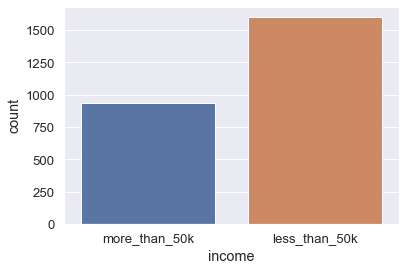

In [102]:
seab.countplot(x=edu_75.income)

The better the education of a person the more than income

## Feature Engineering

### Creating Dummy values for categorical columns

In [103]:
workclass = pd.get_dummies(df.workclass, drop_first=True, prefix='work') # creates dummy columns
df = df.join(workclass)
df.drop(['workclass'], axis=1, inplace=True)

education = pd.get_dummies(df.education, drop_first=True, prefix='educ') # creates dummy columns
df = df.join(education)
df.drop(['education'], axis=1, inplace=True)

status = pd.get_dummies(df.status, drop_first=True, prefix='status') # creates dummy columns
df = df.join(status)
df.drop(['status'], axis=1, inplace=True)

occupation = pd.get_dummies(df.occupation, drop_first=True, prefix='occup') # creates dummy columns
df = df.join(occupation)
df.drop(['occupation'], axis=1, inplace=True)

sex = pd.get_dummies(df.sex, drop_first=True, prefix='sex') # creates dummy columns
df = df.join(sex)
df.drop(['sex'], axis=1, inplace=True)

native_country = pd.get_dummies(df.native_country, drop_first=True, prefix='country') # creates dummy columns
df = df.join(native_country)
df.drop(['native_country'], axis=1, inplace=True)

income = pd.get_dummies(df.income, drop_first=True, prefix='inc') # creates dummy columns
df = df.join(income)
df.drop(['income'], axis=1, inplace=True)

### Feature Selection

In [104]:
target = df.inc_more_than_50k
features = df.drop("inc_more_than_50k", axis=1)

##### Manual Selection

In [105]:
df.corr().abs().sort_values("inc_more_than_50k",axis=0,ascending=False)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,work_Self_emp,work_Without_pay,work_government,educ_Doctorate,...,sex_Male,country_El_Salvador,country_Germany,country_India,country_Mexico,country_Other,country_Philippines,country_Puerto_Rico,country_United_States,inc_more_than_50k
inc_more_than_50k,0.241896,0.009030,0.335228,0.221204,0.149828,0.229546,0.100725,0.012409,0.055256,0.129163,...,0.216800,0.021206,0.014312,0.020148,0.064755,0.018258,0.012856,0.019344,0.040238,1.000000
status_not_married,0.310480,0.028035,0.071683,0.082615,0.078472,0.221530,0.160499,0.007055,0.009226,0.049871,...,0.426501,0.008004,0.001681,0.028945,0.017736,0.015991,0.016772,0.003591,0.030431,0.436116
education_num,0.043492,0.045124,1.000000,0.124427,0.079444,0.152548,0.054264,0.008873,0.158104,0.258695,...,0.006159,0.073319,0.025298,0.052223,0.223544,0.026140,0.026301,0.042087,0.127220,0.335228
age,1.000000,0.076535,0.043492,0.080136,0.060062,0.101563,0.191952,0.015334,0.086682,0.074246,...,0.082137,0.016338,0.006238,0.001539,0.057526,0.010622,0.007930,0.007825,0.016319,0.241896
hours_per_week,0.101563,0.022944,0.152548,0.080446,0.052455,1.000000,0.147354,0.014784,0.015255,0.064644,...,0.231332,0.018930,0.004505,0.002883,0.004210,0.002705,0.008796,0.012017,0.010677,0.229546
capital_gain,0.080136,0.000432,0.124427,1.000000,0.032227,0.080446,0.083738,0.001759,0.016691,0.059676,...,0.048848,0.003766,0.001259,0.019567,0.014219,0.010740,0.000212,0.006272,0.012389,0.221204
sex_Male,0.082137,0.025316,0.006159,0.048848,0.046968,0.231332,0.140527,0.001507,0.046385,0.025987,...,1.000000,0.000689,0.013593,0.026419,0.035168,0.014935,0.009909,0.014919,0.003070,0.216800
occup_Prof_specialty,0.060548,0.017446,0.427084,0.086293,0.046792,0.047387,0.013111,0.008475,0.192208,0.221239,...,0.037655,0.010826,0.022255,0.045069,0.044053,0.004655,0.003493,0.007459,0.003762,0.181442
educ_Masters,0.096302,0.022361,0.363125,0.047173,0.048706,0.066011,0.001965,0.005146,0.141027,0.026792,...,0.005800,0.006110,0.004296,0.055183,0.029091,0.012961,0.005853,0.014380,0.000172,0.173916
occup_Other_service,0.092910,0.004417,0.181799,0.042448,0.043960,0.182331,0.060073,0.002452,0.033859,0.038748,...,0.164408,0.054874,0.010971,0.012438,0.044302,0.029895,0.021815,0.007861,0.057581,0.165985


In [106]:
df_manual = df[["status_not_married","education_num","age","hours_per_week","capital_gain"]]

##### Variance Threshold Selection

In [107]:
vt = VarianceThreshold(threshold=0.6)
vt.fit(features)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=features.columns)
df_vt = features.iloc[:,vt.get_support()]

##### Select K-Best method

In [108]:
selectK = SelectKBest(score_func=f_regression, k=10)
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.3, random_state=42)
selectK.fit_transform(X_train, y_train)
df_selKBest = features.iloc[:,selectK.get_support()]

##### Random Forest Feature Selection

In [109]:
randomf = SelectFromModel(RandomForestClassifier(n_estimators = 100))
randomf.fit(features, target)
df_randonf= features.iloc[:,randomf.get_support()]

### Creating Lists

In [110]:
featSel_list = [df_manual, df_vt, df_selKBest, df_randonf]
featSel_method = ['Manual', 'Variance Threshhold', 'SelectKBest', 'Random Forest']
models =[]
r2_list = []
rmse_list = []
names = []
featSel_method_used =[]
name_of_regressor = []

### Creating Regression Models

In [111]:
linearmodel = LinearRegression()
models.append(linearmodel)
names.append(linearmodel.__class__.__name__)

rfmodel = RandomForestRegressor()
models.append(rfmodel)
names.append(rfmodel.__class__.__name__)

adamodel = AdaBoostRegressor()
models.append(adamodel)
names.append(adamodel.__class__.__name__)

gbmodel = GradientBoostingRegressor()
models.append(gbmodel)
names.append(gbmodel.__class__.__name__)

catmodel = CatBoostRegressor()
models.append(catmodel)
names.append(catmodel.__class__.__name__)

dtmodel = DecisionTreeRegressor(max_depth=4)
models.append(dtmodel)
names.append(dtmodel.__class__.__name__)

xgbmodel = XGBRegressor()
models.append(xgbmodel)
names.append(xgbmodel.__class__.__name__)

lgbmodel = lgb.LGBMClassifier()
models.append(lgbmodel)
names.append(lgbmodel.__class__.__name__)

ann=MLPClassifier(hidden_layer_sizes=(10,5,2),learning_rate='adaptive',learning_rate_init = 0.001,max_iter=3000,random_state=42)
models.append(ann)
names.append(ann.__class__.__name__)

### Pipeline

In [112]:
i=0
for feat in featSel_list:
    X_train, X_test, y_train, y_test = train_test_split(feat, target,test_size=0.3, random_state=42)
    featselmethod = featSel_method[i]
    i = i+1
    j=0
    for model in models:
        pipeline = Pipeline([("transformation", PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)),
                             ("scale", StandardScaler()), 
                             ("Regression", model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        featSel_method_used.append(featselmethod)
        name_of_regressor.append(names[j])
        j=j+1
        r2_list.append(pipeline.score(X_test, y_test))
        rmse_list.append(mean_squared_error(y_test, y_pred)**0.5)

Learning rate set to 0.066289
0:	learn: 0.4194054	total: 3.03ms	remaining: 3.02s
1:	learn: 0.4095539	total: 5.63ms	remaining: 2.81s
2:	learn: 0.4008855	total: 7.92ms	remaining: 2.63s
3:	learn: 0.3932017	total: 10.1ms	remaining: 2.52s
4:	learn: 0.3860724	total: 12.6ms	remaining: 2.52s
5:	learn: 0.3797876	total: 14.9ms	remaining: 2.47s
6:	learn: 0.3740374	total: 17.4ms	remaining: 2.47s
7:	learn: 0.3690858	total: 19.8ms	remaining: 2.46s
8:	learn: 0.3646928	total: 22.2ms	remaining: 2.44s
9:	learn: 0.3604906	total: 24.7ms	remaining: 2.44s
10:	learn: 0.3567514	total: 27ms	remaining: 2.43s
11:	learn: 0.3534972	total: 29.3ms	remaining: 2.41s
12:	learn: 0.3506682	total: 31.7ms	remaining: 2.41s
13:	learn: 0.3481013	total: 34.1ms	remaining: 2.4s
14:	learn: 0.3457989	total: 36.4ms	remaining: 2.39s
15:	learn: 0.3437161	total: 38.7ms	remaining: 2.38s
16:	learn: 0.3419382	total: 41.2ms	remaining: 2.38s
17:	learn: 0.3401860	total: 43.6ms	remaining: 2.38s
18:	learn: 0.3385775	total: 45.9ms	remaining: 2

229:	learn: 0.3152824	total: 538ms	remaining: 1.8s
230:	learn: 0.3152505	total: 541ms	remaining: 1.8s
231:	learn: 0.3152247	total: 543ms	remaining: 1.8s
232:	learn: 0.3152206	total: 545ms	remaining: 1.79s
233:	learn: 0.3151835	total: 548ms	remaining: 1.79s
234:	learn: 0.3151454	total: 550ms	remaining: 1.79s
235:	learn: 0.3151185	total: 553ms	remaining: 1.79s
236:	learn: 0.3150916	total: 555ms	remaining: 1.79s
237:	learn: 0.3150363	total: 558ms	remaining: 1.78s
238:	learn: 0.3150110	total: 560ms	remaining: 1.78s
239:	learn: 0.3149943	total: 562ms	remaining: 1.78s
240:	learn: 0.3149168	total: 564ms	remaining: 1.78s
241:	learn: 0.3148979	total: 567ms	remaining: 1.77s
242:	learn: 0.3148668	total: 569ms	remaining: 1.77s
243:	learn: 0.3148190	total: 571ms	remaining: 1.77s
244:	learn: 0.3148146	total: 573ms	remaining: 1.77s
245:	learn: 0.3147919	total: 576ms	remaining: 1.76s
246:	learn: 0.3147509	total: 578ms	remaining: 1.76s
247:	learn: 0.3147014	total: 581ms	remaining: 1.76s
248:	learn: 0.3

456:	learn: 0.3093749	total: 1.08s	remaining: 1.28s
457:	learn: 0.3093344	total: 1.08s	remaining: 1.28s
458:	learn: 0.3093226	total: 1.09s	remaining: 1.28s
459:	learn: 0.3093171	total: 1.09s	remaining: 1.28s
460:	learn: 0.3092902	total: 1.09s	remaining: 1.27s
461:	learn: 0.3092797	total: 1.09s	remaining: 1.27s
462:	learn: 0.3092510	total: 1.09s	remaining: 1.27s
463:	learn: 0.3092393	total: 1.1s	remaining: 1.27s
464:	learn: 0.3092367	total: 1.1s	remaining: 1.27s
465:	learn: 0.3092267	total: 1.1s	remaining: 1.26s
466:	learn: 0.3092072	total: 1.11s	remaining: 1.26s
467:	learn: 0.3091973	total: 1.11s	remaining: 1.26s
468:	learn: 0.3091617	total: 1.11s	remaining: 1.26s
469:	learn: 0.3091232	total: 1.11s	remaining: 1.26s
470:	learn: 0.3091007	total: 1.12s	remaining: 1.25s
471:	learn: 0.3090725	total: 1.12s	remaining: 1.25s
472:	learn: 0.3090296	total: 1.12s	remaining: 1.25s
473:	learn: 0.3090099	total: 1.12s	remaining: 1.25s
474:	learn: 0.3089761	total: 1.13s	remaining: 1.25s
475:	learn: 0.3

684:	learn: 0.3049864	total: 1.62s	remaining: 745ms
685:	learn: 0.3049588	total: 1.62s	remaining: 743ms
686:	learn: 0.3049386	total: 1.63s	remaining: 741ms
687:	learn: 0.3049260	total: 1.63s	remaining: 738ms
688:	learn: 0.3049126	total: 1.63s	remaining: 736ms
689:	learn: 0.3048903	total: 1.63s	remaining: 734ms
690:	learn: 0.3048531	total: 1.64s	remaining: 732ms
691:	learn: 0.3048258	total: 1.64s	remaining: 729ms
692:	learn: 0.3047981	total: 1.64s	remaining: 727ms
693:	learn: 0.3047673	total: 1.64s	remaining: 724ms
694:	learn: 0.3047584	total: 1.65s	remaining: 722ms
695:	learn: 0.3047536	total: 1.65s	remaining: 720ms
696:	learn: 0.3047290	total: 1.65s	remaining: 717ms
697:	learn: 0.3047170	total: 1.65s	remaining: 715ms
698:	learn: 0.3046782	total: 1.65s	remaining: 712ms
699:	learn: 0.3046420	total: 1.66s	remaining: 710ms
700:	learn: 0.3046318	total: 1.66s	remaining: 708ms
701:	learn: 0.3046198	total: 1.66s	remaining: 705ms
702:	learn: 0.3046109	total: 1.66s	remaining: 703ms
703:	learn: 

914:	learn: 0.3010916	total: 2.16s	remaining: 201ms
915:	learn: 0.3010782	total: 2.17s	remaining: 199ms
916:	learn: 0.3010604	total: 2.17s	remaining: 196ms
917:	learn: 0.3010560	total: 2.17s	remaining: 194ms
918:	learn: 0.3010441	total: 2.17s	remaining: 192ms
919:	learn: 0.3010333	total: 2.17s	remaining: 189ms
920:	learn: 0.3010112	total: 2.18s	remaining: 187ms
921:	learn: 0.3009880	total: 2.18s	remaining: 184ms
922:	learn: 0.3009683	total: 2.18s	remaining: 182ms
923:	learn: 0.3009512	total: 2.18s	remaining: 180ms
924:	learn: 0.3009312	total: 2.19s	remaining: 177ms
925:	learn: 0.3009210	total: 2.19s	remaining: 175ms
926:	learn: 0.3009129	total: 2.19s	remaining: 173ms
927:	learn: 0.3008964	total: 2.19s	remaining: 170ms
928:	learn: 0.3008871	total: 2.2s	remaining: 168ms
929:	learn: 0.3008626	total: 2.2s	remaining: 166ms
930:	learn: 0.3008370	total: 2.2s	remaining: 163ms
931:	learn: 0.3008335	total: 2.2s	remaining: 161ms
932:	learn: 0.3008071	total: 2.21s	remaining: 158ms
933:	learn: 0.30

120:	learn: 0.3391215	total: 364ms	remaining: 2.64s
121:	learn: 0.3390937	total: 367ms	remaining: 2.64s
122:	learn: 0.3390700	total: 370ms	remaining: 2.64s
123:	learn: 0.3390378	total: 373ms	remaining: 2.63s
124:	learn: 0.3389912	total: 376ms	remaining: 2.63s
125:	learn: 0.3389289	total: 379ms	remaining: 2.63s
126:	learn: 0.3388795	total: 382ms	remaining: 2.63s
127:	learn: 0.3387608	total: 385ms	remaining: 2.63s
128:	learn: 0.3387084	total: 388ms	remaining: 2.62s
129:	learn: 0.3386575	total: 391ms	remaining: 2.62s
130:	learn: 0.3386200	total: 394ms	remaining: 2.61s
131:	learn: 0.3385465	total: 397ms	remaining: 2.61s
132:	learn: 0.3384865	total: 400ms	remaining: 2.61s
133:	learn: 0.3383983	total: 403ms	remaining: 2.6s
134:	learn: 0.3383708	total: 405ms	remaining: 2.6s
135:	learn: 0.3383215	total: 408ms	remaining: 2.59s
136:	learn: 0.3382664	total: 412ms	remaining: 2.59s
137:	learn: 0.3381728	total: 415ms	remaining: 2.59s
138:	learn: 0.3381214	total: 417ms	remaining: 2.58s
139:	learn: 0.

311:	learn: 0.3287917	total: 912ms	remaining: 2.01s
312:	learn: 0.3287651	total: 915ms	remaining: 2.01s
313:	learn: 0.3287107	total: 918ms	remaining: 2s
314:	learn: 0.3286092	total: 921ms	remaining: 2s
315:	learn: 0.3285650	total: 924ms	remaining: 2s
316:	learn: 0.3285092	total: 927ms	remaining: 2s
317:	learn: 0.3284899	total: 930ms	remaining: 1.99s
318:	learn: 0.3284784	total: 933ms	remaining: 1.99s
319:	learn: 0.3284172	total: 936ms	remaining: 1.99s
320:	learn: 0.3283843	total: 939ms	remaining: 1.99s
321:	learn: 0.3282929	total: 942ms	remaining: 1.98s
322:	learn: 0.3282455	total: 945ms	remaining: 1.98s
323:	learn: 0.3281914	total: 948ms	remaining: 1.98s
324:	learn: 0.3281541	total: 950ms	remaining: 1.97s
325:	learn: 0.3280919	total: 953ms	remaining: 1.97s
326:	learn: 0.3280582	total: 956ms	remaining: 1.97s
327:	learn: 0.3280153	total: 959ms	remaining: 1.96s
328:	learn: 0.3279509	total: 962ms	remaining: 1.96s
329:	learn: 0.3278931	total: 965ms	remaining: 1.96s
330:	learn: 0.3278333	to

500:	learn: 0.3212541	total: 1.46s	remaining: 1.45s
501:	learn: 0.3212080	total: 1.46s	remaining: 1.45s
502:	learn: 0.3211584	total: 1.46s	remaining: 1.45s
503:	learn: 0.3211174	total: 1.47s	remaining: 1.44s
504:	learn: 0.3210852	total: 1.47s	remaining: 1.44s
505:	learn: 0.3210671	total: 1.47s	remaining: 1.44s
506:	learn: 0.3210478	total: 1.48s	remaining: 1.44s
507:	learn: 0.3210085	total: 1.48s	remaining: 1.43s
508:	learn: 0.3209791	total: 1.48s	remaining: 1.43s
509:	learn: 0.3209645	total: 1.48s	remaining: 1.43s
510:	learn: 0.3209366	total: 1.49s	remaining: 1.42s
511:	learn: 0.3208759	total: 1.49s	remaining: 1.42s
512:	learn: 0.3208597	total: 1.49s	remaining: 1.42s
513:	learn: 0.3208480	total: 1.5s	remaining: 1.42s
514:	learn: 0.3208090	total: 1.5s	remaining: 1.41s
515:	learn: 0.3207831	total: 1.5s	remaining: 1.41s
516:	learn: 0.3207646	total: 1.5s	remaining: 1.41s
517:	learn: 0.3207043	total: 1.51s	remaining: 1.4s
518:	learn: 0.3206804	total: 1.51s	remaining: 1.4s
519:	learn: 0.3206

690:	learn: 0.3154449	total: 2s	remaining: 897ms
691:	learn: 0.3153946	total: 2.01s	remaining: 894ms
692:	learn: 0.3153733	total: 2.01s	remaining: 891ms
693:	learn: 0.3153493	total: 2.01s	remaining: 888ms
694:	learn: 0.3153127	total: 2.02s	remaining: 886ms
695:	learn: 0.3152918	total: 2.02s	remaining: 883ms
696:	learn: 0.3152362	total: 2.02s	remaining: 880ms
697:	learn: 0.3152064	total: 2.03s	remaining: 877ms
698:	learn: 0.3151774	total: 2.03s	remaining: 874ms
699:	learn: 0.3151428	total: 2.03s	remaining: 871ms
700:	learn: 0.3150997	total: 2.04s	remaining: 868ms
701:	learn: 0.3150643	total: 2.04s	remaining: 865ms
702:	learn: 0.3150239	total: 2.04s	remaining: 863ms
703:	learn: 0.3149801	total: 2.04s	remaining: 860ms
704:	learn: 0.3149535	total: 2.05s	remaining: 857ms
705:	learn: 0.3149343	total: 2.05s	remaining: 854ms
706:	learn: 0.3148894	total: 2.05s	remaining: 851ms
707:	learn: 0.3148761	total: 2.06s	remaining: 848ms
708:	learn: 0.3148475	total: 2.06s	remaining: 845ms
709:	learn: 0.3

879:	learn: 0.3097944	total: 2.55s	remaining: 348ms
880:	learn: 0.3097744	total: 2.55s	remaining: 345ms
881:	learn: 0.3097380	total: 2.55s	remaining: 342ms
882:	learn: 0.3097170	total: 2.56s	remaining: 339ms
883:	learn: 0.3097028	total: 2.56s	remaining: 336ms
884:	learn: 0.3096849	total: 2.56s	remaining: 333ms
885:	learn: 0.3096656	total: 2.57s	remaining: 330ms
886:	learn: 0.3096403	total: 2.57s	remaining: 327ms
887:	learn: 0.3096223	total: 2.57s	remaining: 324ms
888:	learn: 0.3095964	total: 2.57s	remaining: 321ms
889:	learn: 0.3095791	total: 2.58s	remaining: 319ms
890:	learn: 0.3095059	total: 2.58s	remaining: 316ms
891:	learn: 0.3094791	total: 2.58s	remaining: 313ms
892:	learn: 0.3094405	total: 2.59s	remaining: 310ms
893:	learn: 0.3094213	total: 2.59s	remaining: 307ms
894:	learn: 0.3094113	total: 2.59s	remaining: 304ms
895:	learn: 0.3093959	total: 2.59s	remaining: 301ms
896:	learn: 0.3093582	total: 2.6s	remaining: 298ms
897:	learn: 0.3093205	total: 2.6s	remaining: 295ms
898:	learn: 0.

48:	learn: 0.3185124	total: 187ms	remaining: 3.62s
49:	learn: 0.3182807	total: 191ms	remaining: 3.62s
50:	learn: 0.3180404	total: 195ms	remaining: 3.62s
51:	learn: 0.3179058	total: 198ms	remaining: 3.62s
52:	learn: 0.3177533	total: 202ms	remaining: 3.61s
53:	learn: 0.3175224	total: 206ms	remaining: 3.6s
54:	learn: 0.3173675	total: 209ms	remaining: 3.6s
55:	learn: 0.3172116	total: 213ms	remaining: 3.59s
56:	learn: 0.3170737	total: 217ms	remaining: 3.58s
57:	learn: 0.3169143	total: 220ms	remaining: 3.58s
58:	learn: 0.3167954	total: 224ms	remaining: 3.57s
59:	learn: 0.3166396	total: 227ms	remaining: 3.56s
60:	learn: 0.3165530	total: 231ms	remaining: 3.55s
61:	learn: 0.3164400	total: 235ms	remaining: 3.55s
62:	learn: 0.3163278	total: 238ms	remaining: 3.54s
63:	learn: 0.3161666	total: 242ms	remaining: 3.54s
64:	learn: 0.3159796	total: 246ms	remaining: 3.53s
65:	learn: 0.3158703	total: 249ms	remaining: 3.53s
66:	learn: 0.3157219	total: 253ms	remaining: 3.52s
67:	learn: 0.3156186	total: 257ms

249:	learn: 0.3042201	total: 918ms	remaining: 2.75s
250:	learn: 0.3041803	total: 922ms	remaining: 2.75s
251:	learn: 0.3041512	total: 926ms	remaining: 2.75s
252:	learn: 0.3041207	total: 930ms	remaining: 2.75s
253:	learn: 0.3040900	total: 933ms	remaining: 2.74s
254:	learn: 0.3040551	total: 937ms	remaining: 2.74s
255:	learn: 0.3040105	total: 941ms	remaining: 2.73s
256:	learn: 0.3039309	total: 945ms	remaining: 2.73s
257:	learn: 0.3038803	total: 949ms	remaining: 2.73s
258:	learn: 0.3038244	total: 952ms	remaining: 2.72s
259:	learn: 0.3037572	total: 956ms	remaining: 2.72s
260:	learn: 0.3036950	total: 960ms	remaining: 2.72s
261:	learn: 0.3036825	total: 963ms	remaining: 2.71s
262:	learn: 0.3036421	total: 967ms	remaining: 2.71s
263:	learn: 0.3036184	total: 971ms	remaining: 2.71s
264:	learn: 0.3035868	total: 975ms	remaining: 2.7s
265:	learn: 0.3035750	total: 978ms	remaining: 2.7s
266:	learn: 0.3035229	total: 982ms	remaining: 2.69s
267:	learn: 0.3034590	total: 985ms	remaining: 2.69s
268:	learn: 0.

448:	learn: 0.2979883	total: 1.65s	remaining: 2.02s
449:	learn: 0.2979786	total: 1.65s	remaining: 2.02s
450:	learn: 0.2979261	total: 1.66s	remaining: 2.02s
451:	learn: 0.2978969	total: 1.66s	remaining: 2.01s
452:	learn: 0.2978946	total: 1.66s	remaining: 2.01s
453:	learn: 0.2978611	total: 1.67s	remaining: 2.01s
454:	learn: 0.2977882	total: 1.67s	remaining: 2s
455:	learn: 0.2977569	total: 1.68s	remaining: 2s
456:	learn: 0.2977321	total: 1.68s	remaining: 2s
457:	learn: 0.2977174	total: 1.68s	remaining: 1.99s
458:	learn: 0.2977037	total: 1.69s	remaining: 1.99s
459:	learn: 0.2976641	total: 1.69s	remaining: 1.98s
460:	learn: 0.2976209	total: 1.69s	remaining: 1.98s
461:	learn: 0.2975734	total: 1.7s	remaining: 1.98s
462:	learn: 0.2975596	total: 1.7s	remaining: 1.97s
463:	learn: 0.2974946	total: 1.71s	remaining: 1.97s
464:	learn: 0.2974644	total: 1.71s	remaining: 1.97s
465:	learn: 0.2974425	total: 1.71s	remaining: 1.96s
466:	learn: 0.2974024	total: 1.72s	remaining: 1.96s
467:	learn: 0.2973894	t

646:	learn: 0.2931439	total: 2.38s	remaining: 1.3s
647:	learn: 0.2931333	total: 2.38s	remaining: 1.29s
648:	learn: 0.2931068	total: 2.39s	remaining: 1.29s
649:	learn: 0.2930934	total: 2.39s	remaining: 1.29s
650:	learn: 0.2930743	total: 2.39s	remaining: 1.28s
651:	learn: 0.2930612	total: 2.4s	remaining: 1.28s
652:	learn: 0.2930513	total: 2.4s	remaining: 1.28s
653:	learn: 0.2930420	total: 2.4s	remaining: 1.27s
654:	learn: 0.2930239	total: 2.41s	remaining: 1.27s
655:	learn: 0.2929818	total: 2.41s	remaining: 1.26s
656:	learn: 0.2929556	total: 2.42s	remaining: 1.26s
657:	learn: 0.2929477	total: 2.42s	remaining: 1.26s
658:	learn: 0.2929411	total: 2.42s	remaining: 1.25s
659:	learn: 0.2929207	total: 2.43s	remaining: 1.25s
660:	learn: 0.2928892	total: 2.43s	remaining: 1.25s
661:	learn: 0.2928437	total: 2.43s	remaining: 1.24s
662:	learn: 0.2928102	total: 2.44s	remaining: 1.24s
663:	learn: 0.2927772	total: 2.44s	remaining: 1.24s
664:	learn: 0.2927648	total: 2.44s	remaining: 1.23s
665:	learn: 0.29

833:	learn: 0.2893867	total: 3.11s	remaining: 619ms
834:	learn: 0.2893749	total: 3.11s	remaining: 616ms
835:	learn: 0.2893620	total: 3.12s	remaining: 612ms
836:	learn: 0.2893617	total: 3.12s	remaining: 608ms
837:	learn: 0.2893430	total: 3.13s	remaining: 604ms
838:	learn: 0.2893237	total: 3.13s	remaining: 601ms
839:	learn: 0.2893123	total: 3.13s	remaining: 597ms
840:	learn: 0.2892897	total: 3.14s	remaining: 593ms
841:	learn: 0.2892509	total: 3.14s	remaining: 590ms
842:	learn: 0.2892224	total: 3.15s	remaining: 586ms
843:	learn: 0.2891930	total: 3.15s	remaining: 582ms
844:	learn: 0.2891840	total: 3.15s	remaining: 578ms
845:	learn: 0.2891585	total: 3.16s	remaining: 575ms
846:	learn: 0.2891203	total: 3.16s	remaining: 571ms
847:	learn: 0.2890986	total: 3.16s	remaining: 567ms
848:	learn: 0.2890904	total: 3.17s	remaining: 563ms
849:	learn: 0.2890823	total: 3.17s	remaining: 560ms
850:	learn: 0.2890571	total: 3.17s	remaining: 556ms
851:	learn: 0.2890516	total: 3.18s	remaining: 552ms
852:	learn: 

Learning rate set to 0.066289
0:	learn: 0.4189835	total: 3.77ms	remaining: 3.77s
1:	learn: 0.4093946	total: 7.17ms	remaining: 3.58s
2:	learn: 0.4002436	total: 10.5ms	remaining: 3.49s
3:	learn: 0.3922485	total: 13.9ms	remaining: 3.46s
4:	learn: 0.3850980	total: 17.2ms	remaining: 3.42s
5:	learn: 0.3788345	total: 20.5ms	remaining: 3.4s
6:	learn: 0.3731505	total: 23.9ms	remaining: 3.38s
7:	learn: 0.3677581	total: 27.2ms	remaining: 3.37s
8:	learn: 0.3632281	total: 30.5ms	remaining: 3.36s
9:	learn: 0.3588059	total: 34.3ms	remaining: 3.4s
10:	learn: 0.3549604	total: 37.5ms	remaining: 3.37s
11:	learn: 0.3517408	total: 40.8ms	remaining: 3.36s
12:	learn: 0.3486179	total: 43.9ms	remaining: 3.33s
13:	learn: 0.3460443	total: 47ms	remaining: 3.31s
14:	learn: 0.3438057	total: 49.9ms	remaining: 3.28s
15:	learn: 0.3414936	total: 53.3ms	remaining: 3.27s
16:	learn: 0.3396857	total: 56.4ms	remaining: 3.26s
17:	learn: 0.3379457	total: 59.5ms	remaining: 3.24s
18:	learn: 0.3363159	total: 62.4ms	remaining: 3.

178:	learn: 0.3090550	total: 541ms	remaining: 2.48s
179:	learn: 0.3089806	total: 544ms	remaining: 2.48s
180:	learn: 0.3089346	total: 547ms	remaining: 2.47s
181:	learn: 0.3089008	total: 550ms	remaining: 2.47s
182:	learn: 0.3088760	total: 553ms	remaining: 2.47s
183:	learn: 0.3088413	total: 556ms	remaining: 2.47s
184:	learn: 0.3087737	total: 559ms	remaining: 2.46s
185:	learn: 0.3087021	total: 562ms	remaining: 2.46s
186:	learn: 0.3086377	total: 566ms	remaining: 2.46s
187:	learn: 0.3085999	total: 569ms	remaining: 2.46s
188:	learn: 0.3085756	total: 572ms	remaining: 2.45s
189:	learn: 0.3085399	total: 575ms	remaining: 2.45s
190:	learn: 0.3084716	total: 578ms	remaining: 2.45s
191:	learn: 0.3084172	total: 581ms	remaining: 2.44s
192:	learn: 0.3083788	total: 584ms	remaining: 2.44s
193:	learn: 0.3083492	total: 587ms	remaining: 2.44s
194:	learn: 0.3083142	total: 589ms	remaining: 2.43s
195:	learn: 0.3082632	total: 592ms	remaining: 2.43s
196:	learn: 0.3081960	total: 595ms	remaining: 2.43s
197:	learn: 

358:	learn: 0.3006718	total: 1.09s	remaining: 1.94s
359:	learn: 0.3006310	total: 1.09s	remaining: 1.94s
360:	learn: 0.3006073	total: 1.09s	remaining: 1.94s
361:	learn: 0.3005850	total: 1.1s	remaining: 1.93s
362:	learn: 0.3005299	total: 1.1s	remaining: 1.93s
363:	learn: 0.3004845	total: 1.1s	remaining: 1.93s
364:	learn: 0.3004388	total: 1.11s	remaining: 1.92s
365:	learn: 0.3004354	total: 1.11s	remaining: 1.92s
366:	learn: 0.3003967	total: 1.11s	remaining: 1.92s
367:	learn: 0.3003367	total: 1.11s	remaining: 1.92s
368:	learn: 0.3002940	total: 1.12s	remaining: 1.91s
369:	learn: 0.3002448	total: 1.12s	remaining: 1.91s
370:	learn: 0.3002277	total: 1.13s	remaining: 1.91s
371:	learn: 0.3001631	total: 1.13s	remaining: 1.91s
372:	learn: 0.3001479	total: 1.13s	remaining: 1.9s
373:	learn: 0.3001285	total: 1.13s	remaining: 1.9s
374:	learn: 0.3000948	total: 1.14s	remaining: 1.9s
375:	learn: 0.3000914	total: 1.14s	remaining: 1.89s
376:	learn: 0.3000350	total: 1.14s	remaining: 1.89s
377:	learn: 0.2999

532:	learn: 0.2947611	total: 1.63s	remaining: 1.43s
533:	learn: 0.2947178	total: 1.64s	remaining: 1.43s
534:	learn: 0.2946706	total: 1.64s	remaining: 1.43s
535:	learn: 0.2946351	total: 1.64s	remaining: 1.42s
536:	learn: 0.2946269	total: 1.65s	remaining: 1.42s
537:	learn: 0.2945947	total: 1.65s	remaining: 1.42s
538:	learn: 0.2945761	total: 1.65s	remaining: 1.41s
539:	learn: 0.2945684	total: 1.66s	remaining: 1.41s
540:	learn: 0.2945257	total: 1.66s	remaining: 1.41s
541:	learn: 0.2944757	total: 1.66s	remaining: 1.4s
542:	learn: 0.2944589	total: 1.66s	remaining: 1.4s
543:	learn: 0.2944125	total: 1.67s	remaining: 1.4s
544:	learn: 0.2943765	total: 1.67s	remaining: 1.39s
545:	learn: 0.2943724	total: 1.67s	remaining: 1.39s
546:	learn: 0.2943701	total: 1.68s	remaining: 1.39s
547:	learn: 0.2943395	total: 1.68s	remaining: 1.39s
548:	learn: 0.2942918	total: 1.68s	remaining: 1.38s
549:	learn: 0.2942613	total: 1.69s	remaining: 1.38s
550:	learn: 0.2942308	total: 1.69s	remaining: 1.38s
551:	learn: 0.2

705:	learn: 0.2893389	total: 2.18s	remaining: 908ms
706:	learn: 0.2892966	total: 2.18s	remaining: 905ms
707:	learn: 0.2892792	total: 2.19s	remaining: 902ms
708:	learn: 0.2892337	total: 2.19s	remaining: 899ms
709:	learn: 0.2892075	total: 2.19s	remaining: 896ms
710:	learn: 0.2891838	total: 2.2s	remaining: 893ms
711:	learn: 0.2891659	total: 2.2s	remaining: 890ms
712:	learn: 0.2891422	total: 2.2s	remaining: 887ms
713:	learn: 0.2891284	total: 2.21s	remaining: 884ms
714:	learn: 0.2891055	total: 2.21s	remaining: 881ms
715:	learn: 0.2890533	total: 2.21s	remaining: 878ms
716:	learn: 0.2889989	total: 2.22s	remaining: 875ms
717:	learn: 0.2889772	total: 2.22s	remaining: 872ms
718:	learn: 0.2889406	total: 2.22s	remaining: 869ms
719:	learn: 0.2889141	total: 2.23s	remaining: 867ms
720:	learn: 0.2888732	total: 2.23s	remaining: 864ms
721:	learn: 0.2888470	total: 2.23s	remaining: 861ms
722:	learn: 0.2888164	total: 2.24s	remaining: 858ms
723:	learn: 0.2887899	total: 2.24s	remaining: 855ms
724:	learn: 0.2

873:	learn: 0.2844584	total: 2.72s	remaining: 393ms
874:	learn: 0.2844304	total: 2.73s	remaining: 390ms
875:	learn: 0.2843956	total: 2.73s	remaining: 386ms
876:	learn: 0.2843888	total: 2.73s	remaining: 383ms
877:	learn: 0.2843394	total: 2.74s	remaining: 380ms
878:	learn: 0.2843082	total: 2.74s	remaining: 377ms
879:	learn: 0.2842776	total: 2.74s	remaining: 374ms
880:	learn: 0.2842566	total: 2.75s	remaining: 371ms
881:	learn: 0.2842347	total: 2.75s	remaining: 368ms
882:	learn: 0.2841963	total: 2.75s	remaining: 365ms
883:	learn: 0.2841716	total: 2.76s	remaining: 362ms
884:	learn: 0.2841377	total: 2.76s	remaining: 359ms
885:	learn: 0.2840857	total: 2.76s	remaining: 356ms
886:	learn: 0.2840651	total: 2.77s	remaining: 353ms
887:	learn: 0.2840229	total: 2.77s	remaining: 350ms
888:	learn: 0.2839934	total: 2.77s	remaining: 346ms
889:	learn: 0.2839732	total: 2.78s	remaining: 343ms
890:	learn: 0.2839391	total: 2.78s	remaining: 340ms
891:	learn: 0.2838965	total: 2.78s	remaining: 337ms
892:	learn: 

In [113]:
result = pd.DataFrame(zip(featSel_method_used,name_of_regressor,r2_list,rmse_list), columns=['Feature Selection','Regressor', 'R2', 'RMSE'])

In [114]:
result.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)

,Feature Selection,Regressor,R2,RMSE
22,SelectKBest,CatBoostRegressor,0.495838,0.310891


After observing the above data, #22 is the best linear model because it has high R2 value and low RMSE value

In [115]:
pipeline = Pipeline([("transformation", PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)), ("scale", StandardScaler()), ("Regression", catmodel)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Learning rate set to 0.066289
0:	learn: 0.4189835	total: 3.71ms	remaining: 3.71s
1:	learn: 0.4093946	total: 7.43ms	remaining: 3.71s
2:	learn: 0.4002436	total: 11.1ms	remaining: 3.69s
3:	learn: 0.3922485	total: 14.7ms	remaining: 3.65s
4:	learn: 0.3850980	total: 18.4ms	remaining: 3.65s
5:	learn: 0.3788345	total: 22.8ms	remaining: 3.77s
6:	learn: 0.3731505	total: 26.1ms	remaining: 3.71s
7:	learn: 0.3677581	total: 29.6ms	remaining: 3.68s
8:	learn: 0.3632281	total: 32.9ms	remaining: 3.62s
9:	learn: 0.3588059	total: 36.1ms	remaining: 3.58s
10:	learn: 0.3549604	total: 39.1ms	remaining: 3.52s
11:	learn: 0.3517408	total: 42.6ms	remaining: 3.51s
12:	learn: 0.3486179	total: 46ms	remaining: 3.49s
13:	learn: 0.3460443	total: 49.4ms	remaining: 3.48s
14:	learn: 0.3438057	total: 52.3ms	remaining: 3.43s
15:	learn: 0.3414936	total: 55.4ms	remaining: 3.41s
16:	learn: 0.3396857	total: 59ms	remaining: 3.41s
17:	learn: 0.3379457	total: 62.1ms	remaining: 3.39s
18:	learn: 0.3363159	total: 65.3ms	remaining: 3.

169:	learn: 0.3095309	total: 543ms	remaining: 2.65s
170:	learn: 0.3095116	total: 546ms	remaining: 2.64s
171:	learn: 0.3094422	total: 548ms	remaining: 2.64s
172:	learn: 0.3093966	total: 552ms	remaining: 2.64s
173:	learn: 0.3093372	total: 555ms	remaining: 2.63s
174:	learn: 0.3093064	total: 558ms	remaining: 2.63s
175:	learn: 0.3092799	total: 561ms	remaining: 2.63s
176:	learn: 0.3092398	total: 565ms	remaining: 2.63s
177:	learn: 0.3091265	total: 568ms	remaining: 2.62s
178:	learn: 0.3090550	total: 572ms	remaining: 2.62s
179:	learn: 0.3089806	total: 575ms	remaining: 2.62s
180:	learn: 0.3089346	total: 578ms	remaining: 2.62s
181:	learn: 0.3089008	total: 582ms	remaining: 2.62s
182:	learn: 0.3088760	total: 585ms	remaining: 2.61s
183:	learn: 0.3088413	total: 588ms	remaining: 2.61s
184:	learn: 0.3087737	total: 591ms	remaining: 2.6s
185:	learn: 0.3087021	total: 595ms	remaining: 2.6s
186:	learn: 0.3086377	total: 598ms	remaining: 2.6s
187:	learn: 0.3085999	total: 601ms	remaining: 2.6s
188:	learn: 0.30

335:	learn: 0.3016145	total: 1.09s	remaining: 2.15s
336:	learn: 0.3015397	total: 1.09s	remaining: 2.15s
337:	learn: 0.3014885	total: 1.1s	remaining: 2.15s
338:	learn: 0.3014246	total: 1.1s	remaining: 2.14s
339:	learn: 0.3013805	total: 1.1s	remaining: 2.14s
340:	learn: 0.3013587	total: 1.1s	remaining: 2.14s
341:	learn: 0.3013414	total: 1.11s	remaining: 2.13s
342:	learn: 0.3012899	total: 1.11s	remaining: 2.13s
343:	learn: 0.3012742	total: 1.11s	remaining: 2.13s
344:	learn: 0.3012278	total: 1.12s	remaining: 2.12s
345:	learn: 0.3012064	total: 1.12s	remaining: 2.12s
346:	learn: 0.3011396	total: 1.13s	remaining: 2.12s
347:	learn: 0.3010912	total: 1.13s	remaining: 2.11s
348:	learn: 0.3010522	total: 1.13s	remaining: 2.11s
349:	learn: 0.3010089	total: 1.13s	remaining: 2.11s
350:	learn: 0.3009676	total: 1.14s	remaining: 2.1s
351:	learn: 0.3009130	total: 1.14s	remaining: 2.1s
352:	learn: 0.3009096	total: 1.14s	remaining: 2.1s
353:	learn: 0.3008906	total: 1.15s	remaining: 2.1s
354:	learn: 0.300852

510:	learn: 0.2955036	total: 1.63s	remaining: 1.56s
511:	learn: 0.2954865	total: 1.64s	remaining: 1.56s
512:	learn: 0.2954434	total: 1.64s	remaining: 1.56s
513:	learn: 0.2954035	total: 1.64s	remaining: 1.55s
514:	learn: 0.2953949	total: 1.65s	remaining: 1.55s
515:	learn: 0.2953592	total: 1.65s	remaining: 1.55s
516:	learn: 0.2953468	total: 1.65s	remaining: 1.54s
517:	learn: 0.2953182	total: 1.66s	remaining: 1.54s
518:	learn: 0.2952858	total: 1.66s	remaining: 1.54s
519:	learn: 0.2952529	total: 1.66s	remaining: 1.53s
520:	learn: 0.2952112	total: 1.67s	remaining: 1.53s
521:	learn: 0.2951814	total: 1.67s	remaining: 1.53s
522:	learn: 0.2951549	total: 1.67s	remaining: 1.52s
523:	learn: 0.2951157	total: 1.68s	remaining: 1.52s
524:	learn: 0.2950778	total: 1.68s	remaining: 1.52s
525:	learn: 0.2950292	total: 1.68s	remaining: 1.51s
526:	learn: 0.2949720	total: 1.69s	remaining: 1.51s
527:	learn: 0.2949365	total: 1.69s	remaining: 1.51s
528:	learn: 0.2949083	total: 1.69s	remaining: 1.51s
529:	learn: 

689:	learn: 0.2897725	total: 2.18s	remaining: 979ms
690:	learn: 0.2897448	total: 2.18s	remaining: 976ms
691:	learn: 0.2897254	total: 2.19s	remaining: 973ms
692:	learn: 0.2896954	total: 2.19s	remaining: 970ms
693:	learn: 0.2896840	total: 2.19s	remaining: 966ms
694:	learn: 0.2896523	total: 2.19s	remaining: 963ms
695:	learn: 0.2896323	total: 2.2s	remaining: 960ms
696:	learn: 0.2895912	total: 2.2s	remaining: 957ms
697:	learn: 0.2895712	total: 2.2s	remaining: 954ms
698:	learn: 0.2895309	total: 2.21s	remaining: 950ms
699:	learn: 0.2895180	total: 2.21s	remaining: 947ms
700:	learn: 0.2894741	total: 2.21s	remaining: 944ms
701:	learn: 0.2894534	total: 2.21s	remaining: 941ms
702:	learn: 0.2894251	total: 2.22s	remaining: 937ms
703:	learn: 0.2894126	total: 2.22s	remaining: 934ms
704:	learn: 0.2893746	total: 2.22s	remaining: 931ms
705:	learn: 0.2893389	total: 2.23s	remaining: 928ms
706:	learn: 0.2892966	total: 2.23s	remaining: 925ms
707:	learn: 0.2892792	total: 2.23s	remaining: 921ms
708:	learn: 0.2

869:	learn: 0.2845549	total: 2.72s	remaining: 407ms
870:	learn: 0.2845190	total: 2.73s	remaining: 404ms
871:	learn: 0.2845130	total: 2.73s	remaining: 401ms
872:	learn: 0.2844713	total: 2.73s	remaining: 398ms
873:	learn: 0.2844584	total: 2.74s	remaining: 395ms
874:	learn: 0.2844304	total: 2.74s	remaining: 391ms
875:	learn: 0.2843956	total: 2.74s	remaining: 388ms
876:	learn: 0.2843888	total: 2.75s	remaining: 385ms
877:	learn: 0.2843394	total: 2.75s	remaining: 382ms
878:	learn: 0.2843082	total: 2.75s	remaining: 379ms
879:	learn: 0.2842776	total: 2.76s	remaining: 376ms
880:	learn: 0.2842566	total: 2.76s	remaining: 373ms
881:	learn: 0.2842347	total: 2.76s	remaining: 370ms
882:	learn: 0.2841963	total: 2.77s	remaining: 366ms
883:	learn: 0.2841716	total: 2.77s	remaining: 363ms
884:	learn: 0.2841377	total: 2.77s	remaining: 360ms
885:	learn: 0.2840857	total: 2.77s	remaining: 357ms
886:	learn: 0.2840651	total: 2.78s	remaining: 354ms
887:	learn: 0.2840229	total: 2.78s	remaining: 351ms
888:	learn: 

Text(0.5, 1.0, 'Best Regression Model to Predict Income')

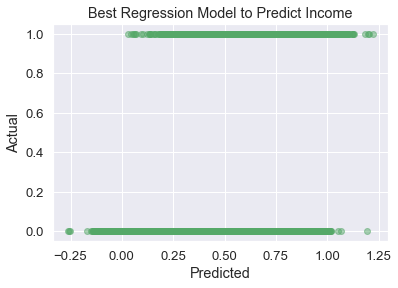

In [116]:
# plot the prediction vs actual
plt.scatter(y_pred, y_test, alpha=0.5, color='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Best Regression Model to Predict Income')

In [117]:
# PolynomialFeatures Function

def PolyFeat(dataFrame):
    pf = PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
    fit_pf = pf.fit(dataFrame)
    poly = pd.DataFrame(pf.transform(dataFrame), columns = fit_pf.get_feature_names(dataFrame.columns))
    return poly

In [118]:
# Scaling Function 

def Scaling(scale,dataFrame):
    scaled_features = scale.fit_transform(dataFrame)
    scaled_df = pd.DataFrame(scaled_features, columns = dataFrame.columns)
    return scaled_df

In [119]:
### This cell is gonna take a lot of time to run (around 1 hours on my system)

Poly_features = PolyFeat(features)
Poly_scaled_df = Scaling(StandardScaler(),Poly_features)

X_train, X_test, y_train, y_test = train_test_split(Poly_scaled_df, target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

print("Tuning of hyper-parameters in progress...\n")
grid_param = {'kernel': ['linear'],'gamma': [5],
                   'C': [5], 'degree': [2]}

classifier = GridSearchCV(SVC(random_state=42), grid_param, cv=3)
classifier.fit(X_train, y_train)



Tuning of hyper-parameters in progress...



GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [5], 'degree': [2], 'gamma': [5],
                         'kernel': ['linear']})

0.83508 (+/-0.00776) for {'C': 5, 'degree': 2, 'gamma': 5, 'kernel': 'linear'}

Best parameters set found: {'C': 5, 'degree': 2, 'gamma': 5, 'kernel': 'linear'}
Best model validation accuracy: 0.8350827928435907
              precision    recall  f1-score   support

           0       0.75      0.57      0.64      1947
           1       0.86      0.93      0.90      5592

    accuracy                           0.84      7539
   macro avg       0.80      0.75      0.77      7539
weighted avg       0.83      0.84      0.83      7539



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

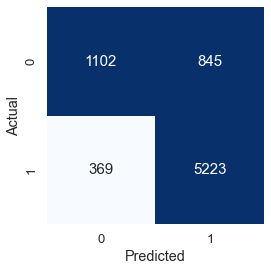

In [120]:
means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))

print("\nBest parameters set found:", classifier.best_params_)
print("Best model validation accuracy:", classifier.best_score_)

gs_best = classifier.best_estimator_
y_pred = gs_best.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

data = confusion_matrix(y_test, y_pred)
df_conf = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_conf.index.name = 'Actual'
df_conf.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
seab.set(font_scale=1.2)
seab.heatmap(df_conf, annot=True,annot_kws={"size": 15}, cbar=False,
          vmax=400, square=True, fmt="d", cmap="Blues")